In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


### Importing dataset

In [21]:
dataset = pd.read_csv('breast_cancer.csv')
dataset = dataset.drop(columns=['Sample code number'])
dataset = dataset.reset_index(drop=True)

### Evaluate models

In [22]:
def evaluate_models(data): 
    # Splitting the dataset into the training and test set
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "SVC": SVC(kernel='rbf', random_state=42)
    }

    accuracies = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
        accuracies[name] = round(float(scores.mean() * 100), 2)

    return accuracies

In [26]:
accurecies = evaluate_models(dataset)
accurecies

{'Logistic Regression': 96.71,
 'Naive Bayes': 96.33,
 'K-Nearest Neighbors': 96.71,
 'Decision Tree': 94.33,
 'Random Forest': 96.52,
 'SVC': 96.71}

In [27]:
def plot_accuracies(accuracies):
    # Modelleri ve doğruluklarını ayır
    models = list(accuracies.keys())
    scores = list(accuracies.values())

    # Grafik oluştur
    plt.figure(figsize=(10, 6))
    plt.barh(models, scores, color='skyblue')
    plt.xlabel('Doğruluk Oranı (%)')
    plt.title('Model Doğruluk Oranları')
    plt.xlim(0, 100)  # Doğruluk oranlarını %0 - %100 arasında göster
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Grafik göster
    plt.show()

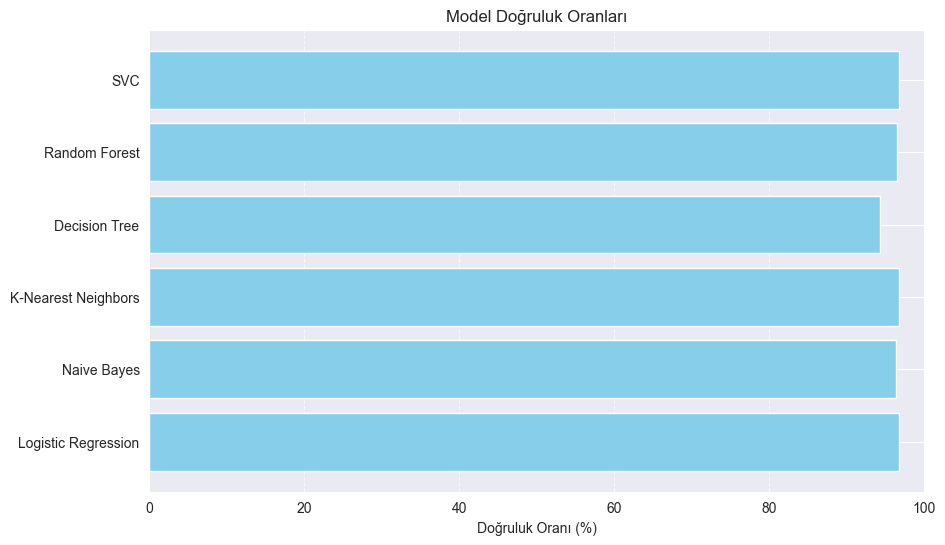

In [28]:
plot_accuracies(accurecies)